In [1]:
import os
import sys
import cv2
import configparser
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import application.extractor.extract as extractor
from IPython.display import display
import application.detector.detect as detector
import application.enhancer.enhance as enhancer
import application.enhancer.mtcn_face as mtcn_face
import ipywidgets as widgets



Text(value='./application/input/example_data/01.tif', description='Path:', placeholder='Type something')

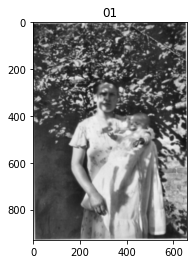

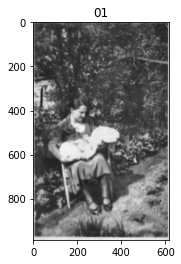

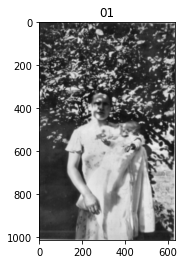

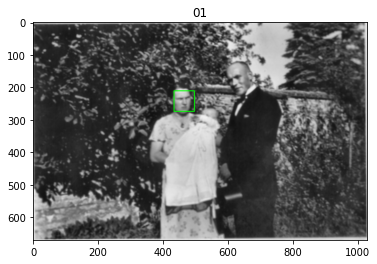

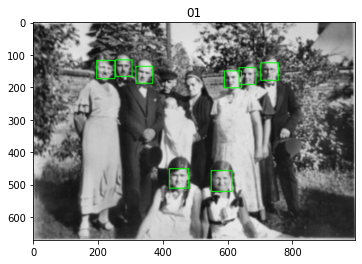

In [3]:
path = './application/input/example_data/01.tif'
image_folder_box = widgets.Text(
    value=r'./application/input/example_data/01.tif',
    placeholder='Type something',
    description='Path:',
    disabled=False
)
display(image_folder_box)
img = cv2.imread(image_folder_box.value, cv2.IMREAD_COLOR)

if img is None:
    sys.exit("Error no image found!")

full_name = os.path.basename(path)
name = os.path.splitext(full_name)[0]
config = []
cropped_images = extractor.get_background_extracted_images(img, config)
enhance = True
face = True
mtcnn_face = False
for i, image in enumerate(cropped_images):

    img = extractor.get_frame_extracted_image(image, config)
    if enhance:
        img = enhancer.enhance_image(img)
    if mtcnn_face:
        mtcnnDetector = MTCNN()
        # detect faces in the image
        faces = mtcnnDetector.detect_faces(img)
        # display faces on the original image
        pyplot = mtcn_face.draw_image_with_boxes(img, faces, name + '_' + str(i))
        pyplot.show()
    if face:
        path_frontal_classifier = './application/detector/cascade/haarcascade_frontalface.xml'
        path_profile_classifier = './application/detector/cascade/haarcascade_profileface.xml'
        frontal_classifier = cv2.CascadeClassifier(path_frontal_classifier)
        profile_classifier = cv2.CascadeClassifier(path_profile_classifier)
        detector.get_detected_faces(img, frontal_classifier, profile_classifier, config, '/output', name + '_' + str(i))
        pyplot.imshow(img)
        pyplot.title(name)
        pyplot.show()
    